Name: Tzu-Hua Huang

## Set up

In [161]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [162]:
import os

# the base Google Drive directory
root_dir = "/content/gdrive/MyDrive/Colab Notebooks/BA870/"

# choose where you want your project files to be saved
project_folder = "Individual Project/"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/gdrive/MyDrive/Colab Notebooks/BA870/Individual Project/

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [163]:
!pwd

/content/gdrive/MyDrive/Colab Notebooks/BA870/Individual Project


Check if the function worked by listing the files in the project folder. During the very first run it should contain only `new_file_in_working_directory.txt`. If you upload other files to your `project_folder`, other files will be listed too. 

In [164]:
!ls

'Individual Project- Tzu-Hua Huang.ipynb'   tempGICS.csv
 new_file_in_working_directory.txt	    tempNAICS.csv
 Return2020.csv				    tempSIC.csv
 Return2020_w_Industry_Codes.csv	    WRDS_Variables.csv


Please upload the necessary files (`stock_des.csv`, `ta.csv`, `rev.csv`) in your `project_folder` folder. 

You can upload the files in your Google Drive `project_folder` via drive.google.com or via below `files.upload()` button. 

In [165]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2019 Financial Accounting Characteristics that Explain Varying Exposures to Covid-19 Market Shock (for Early and Late 2020


## Step 1. Load and merge data

Load the data from `temp1.csv` and `temp2.csv` into Pandas dataframes. Merge the datasets based on each stock's ticker symbol (TIC).

In [166]:
# load data including RetEarly2020 and RetLate2020
temp1 = pd.read_csv('Return2020.csv')
temp1.head()

,TICKER,RetEarly2020,RetLate2020
0,JJSF,-0.340234493,0.300340
1,PLXS,-0.290875889,0.433469
2,HNGR,-0.435711705,0.411425
3,ORCL,-0.08359557,0.356166
4,MSFT,0.003212116,0.421139


In [167]:
# check data
temp1.info()
temp1[temp1.isnull().any(axis=1)]
# temp1['RetEarly2020'] = pd.to_numeric(temp1['RetEarly2020']) # -- ValueError: Unable to parse string "#VALUE!"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TICKER        2716 non-null   object 
 1   RetEarly2020  2716 non-null   object 
 2   RetLate2020   2716 non-null   float64
dtypes: float64(1), object(2)
memory usage: 63.8+ KB


,TICKER,RetEarly2020,RetLate2020


`ValueError` occurs when converting the datatype of `RetEarly2020`. Thus, we drop the rows with errors accroding to the warning message.

In [168]:
# drop the rows with errors
temp1.drop(temp1.loc[temp1['RetEarly2020'] == '#VALUE!'].index, inplace=True)

# convert datatype of RetEarly2020 from object to float
temp1['RetEarly2020'] = pd.to_numeric(temp1['RetEarly2020'])
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711 entries, 0 to 2715
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TICKER        2711 non-null   object 
 1   RetEarly2020  2711 non-null   float64
 2   RetLate2020   2711 non-null   float64
dtypes: float64(2), object(1)
memory usage: 84.7+ KB


Download required variables for creating financial ratios from WRDS Compustat. Load data set `WRDS_Variables.csv` and save as `temp2`.


In [169]:
# load data #2
temp2 = pd.read_csv('WRDS_Variables.csv')

# display all rows of dataframe
# pd.set_option('display.max_rows', None)
temp2.sample(20)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,ogm,act,at,che,dltt,ebit,emp,intan,invt,lct,lt,ni,ppent,re,revt,sale,xint,xintd,costat,city,ggroup,loc,state,ipodate
1392,28742,20191231,2019.0,INDL,C,D,STD,BWA,USD,NaN,3836.000,9702.000,832.000,1741.000,1228.000,29.000,2244.000,807.000,2329.000,4858.000,746.000,3010.000,5215.000,10168.000,10168.000,71.000,NaN,A,Auburn Hills,2510,USA,MI,19930812.0
105,3028,20191231,2019.0,INDL,C,D,STD,CHDN,USD,NaN,221.200,2551.000,142.500,1491.100,233.800,5.500,736.900,0.000,301.200,2040.000,137.500,937.300,508.300,1329.700,1329.700,70.900,NaN,A,Louisville,2530,USA,KY,NaN
2239,128978,20191231,2019.0,INDL,C,D,STD,PKG,USD,NaN,2478.400,7235.800,767.400,2670.400,1086.700,15.500,1258.900,794.100,723.800,4164.800,696.400,3407.600,2545.300,6964.300,6964.300,93.500,NaN,A,Lake Forest,1510,USA,IL,20000127.0
1224,25349,20191231,2019.0,INDL,C,D,STD,GBT,USD,NaN,627.997,796.099,609.969,145.918,-289.584,0.352,0.000,1.277,71.453,217.405,-266.766,79.888,-738.162,2.108,2.108,0.894,NaN,A,South San Francisco,3520,USA,CA,NaN
1121,23793,20191231,2019.0,INDL,C,D,STD,PSB,USD,NaN,NaN,2046.443,63.874,0.000,189.085,0.155,6.900,0.000,NaN,84.632,174.966,NaN,63.666,434.338,434.338,0.657,NaN,A,Glendale,6010,USA,CA,NaN
2803,196055,20191231,2019.0,INDL,C,D,STD,CLVS,USD,NaN,366.468,669.604,296.659,709.221,-357.595,0.484,125.994,26.519,133.084,843.861,-400.424,43.428,-2288.380,143.006,143.006,19.405,19.294,A,Boulder,3520,USA,CO,20111116.0
1645,33598,20191231,2019.0,INDL,C,D,STD,USX,USD,NaN,256.728,1140.109,5.687,520.931,25.239,8.572,84.922,7.193,305.491,909.273,-3.647,768.401,-20.982,1707.361,1707.361,21.635,NaN,A,Chattanooga,2030,USA,TN,20180614.0
2711,184551,20191231,2019.0,INDL,C,D,STD,MXL,USD,NaN,181.770,705.791,93.057,216.244,-19.421,0.697,426.301,31.510,66.562,290.871,-19.898,27.591,-114.683,317.180,317.180,11.133,NaN,A,Carlsbad,4530,USA,CA,20100324.0
1436,29508,20190630,2019.0,INDL,C,D,STD,PCSB,USD,NaN,NaN,1637.579,60.029,46.088,17.024,0.182,6.429,1.158,NaN,1356.272,8.318,11.802,129.410,56.549,56.549,NaN,NaN,A,Yorktown Heights,4010,USA,NY,20170421.0
1960,61635,20191231,2019.0,INDL,C,D,STD,NWPX,USD,NaN,195.039,310.245,31.014,7.468,30.918,0.765,1.231,121.840,41.566,62.087,27.902,107.314,127.517,279.317,279.317,0.472,NaN,A,Vancouver,2010,USA,WA,19951130.0


In [170]:
# check data
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     2839 non-null   int64  
 1   datadate  2839 non-null   int64  
 2   fyear     2838 non-null   float64
 3   indfmt    2839 non-null   object 
 4   consol    2839 non-null   object 
 5   popsrc    2839 non-null   object 
 6   datafmt   2839 non-null   object 
 7   tic       2839 non-null   object 
 8   curcd     2838 non-null   object 
 9   ogm       38 non-null     object 
 10  act       2147 non-null   float64
 11  at        2831 non-null   float64
 12  che       2831 non-null   float64
 13  dltt      2822 non-null   float64
 14  ebit      2830 non-null   float64
 15  emp       2731 non-null   float64
 16  intan     2802 non-null   float64
 17  invt      2793 non-null   float64
 18  lct       2147 non-null   float64
 19  lt        2825 non-null   float64
 20  ni        2830 non-null   floa

In [171]:
# data cleaning - remove unnecessary or incomplete fields
temp2.drop(columns=['gvkey', 'datadate', 'fyear', 'indfmt', 'consol',	'popsrc',	'datafmt', 
                    'curcd', 'ogm', 'revt', 'xintd', 'costat', 'ipodate'], inplace=True)
temp2.head()

,tic,act,at,che,dltt,ebit,emp,intan,invt,lct,lt,ni,ppent,re,sale,xint,city,ggroup,loc,state
0,AIR,1438.700,2079.000,424.700,670.900,108.400,5.40,125.800,692.700,383.100,1176.400,4.400,437.100,661.400,2089.300,9.300,Wood Dale,2010,USA,IL
1,AAL,8206.000,59995.000,3984.000,28875.000,3706.000,133.70,6175.000,1851.000,18311.000,60113.000,1686.000,43732.000,-4067.000,45768.000,1095.000,Fort Worth,2030,USA,TX
2,CECE,179.498,408.637,36.958,81.457,19.622,0.83,197.594,55.383,115.188,215.620,17.707,28.881,-60.849,341.869,4.997,Dallas,2020,USA,TX
3,PNW,1030.030,18479.247,10.283,4884.430,671.960,6.21,290.564,345.920,2078.365,12926.059,538.320,14377.787,2780.514,3471.209,235.251,Phoenix,5510,USA,AZ
4,PRG,NaN,3297.800,57.755,626.530,313.931,12.10,927.378,14.000,NaN,1560.541,31.472,1986.294,2029.594,3947.656,16.967,Draper,4020,USA,UT


In [172]:
# merge data set temp1 anf temp2
df = temp1.merge(temp2, left_on='TICKER', right_on='tic')
df

,TICKER,RetEarly2020,RetLate2020,tic,act,at,che,dltt,ebit,emp,intan,invt,lct,lt,ni,ppent,re,sale,xint,city,ggroup,loc,state
0,JJSF,-0.340234,0.300340,JJSF,506.357,1019.339,243.486,0.718,116.956,4.600,157.433,116.165,121.234,185.588,94.819,253.448,788.007,1186.487,NaN,Pennsauken,3020,USA,NJ
1,PLXS,-0.290876,0.433469,PLXS,1538.291,2000.883,226.254,187.278,143.733,19.000,NaN,700.938,865.503,1135.307,108.616,384.224,1160.893,3164.434,12.853,Neenah,4520,USA,WI
2,HNGR,-0.435712,0.411425,HNGR,315.655,842.253,74.419,578.539,66.928,4.800,250.196,68.204,208.406,832.749,27.525,196.104,-344.502,1098.046,34.258,Austin,3510,USA,TX
3,ORCL,-0.083596,0.356166,ORCL,52140.000,115438.000,43057.000,70726.000,14139.000,135.000,47507.000,211.000,17200.000,102721.000,10135.000,8244.000,-14412.000,39068.000,1995.000,Austin,4510,USA,TX
4,MSFT,0.003212,0.421139,MSFT,175552.000,286556.000,133819.000,79107.000,42959.000,144.000,49776.000,2063.000,69420.000,184226.000,39240.000,43856.000,23810.000,125843.000,2686.000,Redmond,4510,USA,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SIX,-0.716471,1.719300,SIX,376.240,2882.540,174.179,2455.033,424.564,50.450,1004.830,55.851,339.732,3069.400,179.065,1485.124,-1784.457,1480.083,114.703,Arlington,2530,USA,TX
2662,VPG,-0.409412,0.567728,VPG,212.561,370.413,86.910,5.828,33.249,2.400,69.216,66.895,88.911,128.661,22.188,69.961,51.585,283.958,1.507,Malvern,4520,USA,PA
2663,FN,-0.158545,0.422103,FN,1023.835,1255.318,437.332,57.790,124.999,11.670,7.592,293.612,313.048,392.219,120.955,210.686,752.197,1584.335,5.381,George Town,4520,CYM,NaN
2664,CBOE,-0.253901,0.056516,CBOE,607.600,5113.900,300.300,914.300,585.700,0.823,4301.700,0.000,281.600,1758.300,374.400,100.400,1550.200,2496.100,37.800,Chicago,4020,USA,IL


In [173]:
# clean and rename columns
df.drop(columns=['tic'], inplace=True)
df.rename(columns={'act':'Current Assets', 'at':'Total Assets', 'che':'Cash', 'ebit':'EBIT', 
                   'dltt':'Long-term Debt', 'emp':'#Employees', 'intan':'Intangible Assets', 
                   'invt':'Inventories', 'lct':'Current Liabil', 'lt':'Total Liabil', 'ni':'NI', 
                   'ppent':'PP&E', 're':'Retained Earnings', 'sale':'Sales', 'xint':'Interest Expenses',
                   'city':'City', 'ggroup':'GGROUP', 'loc':'Location', 'state':'State'}, inplace=True)
df.head()

,TICKER,RetEarly2020,RetLate2020,Current Assets,Total Assets,Cash,Long-term Debt,EBIT,#Employees,Intangible Assets,Inventories,Current Liabil,Total Liabil,NI,PP&E,Retained Earnings,Sales,Interest Expenses,City,GGROUP,Location,State
0,JJSF,-0.340234,0.300340,506.357,1019.339,243.486,0.718,116.956,4.6,157.433,116.165,121.234,185.588,94.819,253.448,788.007,1186.487,NaN,Pennsauken,3020,USA,NJ
1,PLXS,-0.290876,0.433469,1538.291,2000.883,226.254,187.278,143.733,19.0,NaN,700.938,865.503,1135.307,108.616,384.224,1160.893,3164.434,12.853,Neenah,4520,USA,WI
2,HNGR,-0.435712,0.411425,315.655,842.253,74.419,578.539,66.928,4.8,250.196,68.204,208.406,832.749,27.525,196.104,-344.502,1098.046,34.258,Austin,3510,USA,TX
3,ORCL,-0.083596,0.356166,52140.000,115438.000,43057.000,70726.000,14139.000,135.0,47507.000,211.000,17200.000,102721.000,10135.000,8244.000,-14412.000,39068.000,1995.000,Austin,4510,USA,TX
4,MSFT,0.003212,0.421139,175552.000,286556.000,133819.000,79107.000,42959.000,144.0,49776.000,2063.000,69420.000,184226.000,39240.000,43856.000,23810.000,125843.000,2686.000,Redmond,4510,USA,WA


- According [WRDS Compustat North America User’s Guide](http://sites.bu.edu/qm222projectcourse/files/2014/08/compustat_users_guide-2003.pdf), the unit of `#Employees` is 'Thousands'. Adjust the column values by multiplying the column values by 1000.
- Add new column `Total Equity` for later use.

In [174]:
# fix column values to desirable unit
df['#Employees'] = df['#Employees'] * 1000

# add new column - Total Equity
df['Total Equity'] = df['Total Assets'] - df['Total Liabil']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 0 to 2665
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TICKER             2666 non-null   object 
 1   RetEarly2020       2666 non-null   float64
 2   RetLate2020        2666 non-null   float64
 3   Current Assets     2003 non-null   float64
 4   Total Assets       2664 non-null   float64
 5   Cash               2664 non-null   float64
 6   Long-term Debt     2657 non-null   float64
 7   EBIT               2664 non-null   float64
 8   #Employees         2647 non-null   float64
 9   Intangible Assets  2635 non-null   float64
 10  Inventories        2626 non-null   float64
 11  Current Liabil     2003 non-null   float64
 12  Total Liabil       2658 non-null   float64
 13  NI                 2664 non-null   float64
 14  PP&E               2534 non-null   float64
 15  Retained Earnings  2656 non-null   float64
 16  Sales              2664 

In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2666.0,-0.290915,0.313196,-0.908665,-0.440401,-0.312152,-0.171201,7.512067e+00
RetLate2020,2666.0,0.804400,1.074286,-0.858458,0.252418,0.547064,1.000302,1.899385e+01
Current Assets,2003.0,2716.237148,9611.607647,1.584000,211.649500,553.918000,1658.592000,1.755520e+05
Total Assets,2664.0,17351.452124,101497.142116,2.215000,729.553750,2354.388000,7813.852500,2.687379e+06
Cash,2664.0,1943.994080,18392.290725,0.000000,63.961250,176.490500,523.115000,5.127880e+05
Long-term Debt,2657.0,3439.395660,13418.133870,0.000000,60.818000,468.300000,2154.100000,2.617200e+05
EBIT,2664.0,802.302467,3251.873392,-8596.000000,17.606250,113.542000,459.727000,6.393000e+04
#Employees,2647.0,15090.848130,60891.497973,0.000000,448.500000,2290.000000,9500.000000,2.200000e+06
Intangible Assets,2635.0,2477.931363,10750.593625,0.000000,14.664500,187.907000,1100.097500,3.038580e+05
Inventories,2626.0,948.039702,11731.256877,0.000000,0.000000,21.925500,251.135000,4.023900e+05


## Step 2. Create new dataframe for financial ratios

Create a list of financial ratio variables that would help explain the cross-sectional variation in returns.

- Cash/Total Assets (Do firms with more cash at end of 2019 have
higher stock returns in 2020 after Covid shock?)
- Cash/Current_Liabilities (Do firms with more cash to cover current liabilities at end of 2019 have higher stock returns in 2020
after Covid shock?)
- Cash/Interest Expense (Do firms with more cash to cover
immediate interest expenses have higher stock returns in 2020
after Covid shock?)
- Quick Ratio (Do firms with more liquid assets to cover current
liabilities at end of 2019 have higher stock returns in 2020 after
Covid shock?)
- Long_Term_Debt/Total Assets (Do firms with lower Long Term
Debt at end of 2019 have higher stock returns in 2020 after Covid
shock?)
- EBIT/Interest Expense (Do firms with high 2019 earnings to cover
interest expenses have higher stock returns in 2020 after Covid
shock?)
- Fixed Assets/Total_Assets (Do firms with higher fixed assets
perform better or worse in 2020 after Covid shock?)
- Net Sales/# Employees = Sales per Employee (Do firms that have higher versus lower reliance on labor perform better or worse in 2020 after Covid shock?)
- Geographic Location (Do firms in certain States, Cities or ZipCodes have higher versus lower stock returns in 2020 after Covid-19 shock? Is there an economic story to support these patterns?)

In [176]:
df1 = pd.DataFrame()
df1['TICKER'] = df['TICKER']
df1['RetEarly2020'] = df['RetEarly2020']
df1['RetLate2020'] = df['RetLate2020']

# Cash/Total Assets
df1['Cash/TA'] = df['Cash']/df['Total Assets']

# Cash/Current_Liabilities
df1['Cash/CL'] = df['Cash']/df['Current Liabil']

# Cash/Interest Expense
df1['Cash/Interest Expense'] = df['Cash']/df['Interest Expenses']

# Quick ratio = (CA - Inventories) / CL
df1['Quick Ratio'] = (df['Current Assets'] - df['Inventories'])/df['Current Liabil']

# Long_Term_Debt/Total Assets
df1['Long-term Debt/TA'] = df['Long-term Debt']/df['Total Assets']

# EBIT/Interest Expense
df1['EBIT/Interest Expense'] = df['EBIT']/df['Interest Expenses']

# Fixed Assets/Total_Assets
df1['Fixed Assets/TA'] = df['PP&E']/df['Total Assets']

# Net Sales/# Employees = Sales per Employee
df1['Sales per Employee'] = df['Sales']/df['#Employees']

df1.sample(5)

,TICKER,RetEarly2020,RetLate2020,Cash/TA,Cash/CL,Cash/Interest Expense,Quick Ratio,Long-term Debt/TA,EBIT/Interest Expense,Fixed Assets/TA,Sales per Employee
668,MEDP,-0.127053,0.896975,0.115408,0.384604,112.945205,NaN,0.039553,109.642979,0.086997,0.245991
967,DELL,-0.230395,0.853097,0.084401,0.191246,3.750280,0.640289,0.384306,1.318131,0.065917,0.558509
2108,HSII,-0.303076,0.331331,0.394317,0.963891,NaN,1.431862,0.094042,NaN,0.151676,0.407648
151,KSU,-0.167015,0.616383,0.015204,0.302870,1.283865,1.176471,0.338589,9.060397,0.677361,0.407102
1892,REV,-0.489729,0.086917,0.034993,0.108998,0.493845,0.692862,1.006341,0.386837,0.170972,0.342648


## Step 3. Check data 

### 3.a Check for extreme/inf values

In [177]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2666.0,-0.290915,0.313196,-0.908665,-0.440401,-0.312152,-0.171201,7.512067
RetLate2020,2666.0,0.804400,1.074286,-0.858458,0.252418,0.547064,1.000302,18.993847
Cash/TA,2664.0,0.187950,0.244027,0.000000,0.027972,0.076713,0.233408,0.997352
Cash/CL,2003.0,2.083432,5.662733,0.000000,0.206512,0.579562,1.635736,131.641988
Cash/Interest Expense,2221.0,inf,NaN,0.000000,1.683858,6.729831,34.755518,inf
Quick Ratio,1978.0,2.855418,5.816238,0.056552,0.906597,1.434861,2.648404,132.760649
Long-term Debt/TA,2657.0,0.262368,0.240826,0.000000,0.053111,0.232472,0.402346,3.092259
EBIT/Interest Expense,2222.0,NaN,NaN,-inf,0.934564,3.432021,9.559087,inf
Fixed Assets/TA,2534.0,0.212759,0.236853,0.000000,0.033470,0.120424,0.299720,0.954753
Sales per Employee,2647.0,inf,NaN,0.000000,0.222206,0.353485,0.706061,inf


- From the previous descriptive statistics, we find several fields have minimum of 0. For those columns, if we use them as denominator for calculating financial ratios, we will receive infinity values as the above descriptive statistics table shows. Thus, we will invert the relevant ratios using these variables as denominator.

- For `Cash/Interest Expense`, both of the variables have 0, if we consider the number of problematic values compared to the size of data set, we may not to consider this ratio in the model.

- For `Sales per Employee`, similarly, both of the variables have 0. Compared to the size of data set, the number of extreme and missing values are acceptable. Rather than invert the ratio, we can delete the rows with extreme and missing values.

In [178]:
# df1.drop(columns=['Cash/Interest Expense'], inplace=True)

# invert ratios with infinity values
# drop the columns first
df1.drop(columns=['EBIT/Interest Expense'], inplace=True)

# invert EBIT/Interest Expense to Interest Expense/EBIT
df1['Interest Expense/EBIT'] = df['Interest Expenses']/df['EBIT']
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2666.0,-0.290915,0.313196,-0.908665,-0.440401,-0.312152,-0.171201,7.512067
RetLate2020,2666.0,0.804400,1.074286,-0.858458,0.252418,0.547064,1.000302,18.993847
Cash/TA,2664.0,0.187950,0.244027,0.000000,0.027972,0.076713,0.233408,0.997352
Cash/CL,2003.0,2.083432,5.662733,0.000000,0.206512,0.579562,1.635736,131.641988
Cash/Interest Expense,2221.0,inf,NaN,0.000000,1.683858,6.729831,34.755518,inf
Quick Ratio,1978.0,2.855418,5.816238,0.056552,0.906597,1.434861,2.648404,132.760649
Long-term Debt/TA,2657.0,0.262368,0.240826,0.000000,0.053111,0.232472,0.402346,3.092259
Fixed Assets/TA,2534.0,0.212759,0.236853,0.000000,0.033470,0.120424,0.299720,0.954753
Sales per Employee,2647.0,inf,NaN,0.000000,0.222206,0.353485,0.706061,inf
Interest Expense/EBIT,2222.0,0.147208,2.309836,-62.025641,0.003666,0.132971,0.350891,15.335968


### 3.b Check for missing values

In [179]:
# check columns with na values
df1.isna().sum()

TICKER                     0
RetEarly2020               0
RetLate2020                0
Cash/TA                    2
Cash/CL                  663
Cash/Interest Expense    445
Quick Ratio              688
Long-term Debt/TA          9
Fixed Assets/TA          132
Sales per Employee        19
Interest Expense/EBIT    444
dtype: int64

- All of the ratios have NaN values, compared to the size of the whole data set, rather than delete them directly, we replace the missing values with the sample mean.

In [180]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2666.0,-0.290915,0.313196,-0.908665,-0.440401,-0.312152,-0.171201,7.512067
RetLate2020,2666.0,0.804400,1.074286,-0.858458,0.252418,0.547064,1.000302,18.993847
Cash/TA,2664.0,0.187950,0.244027,0.000000,0.027972,0.076713,0.233408,0.997352
Cash/CL,2003.0,2.083432,5.662733,0.000000,0.206512,0.579562,1.635736,131.641988
Cash/Interest Expense,2221.0,inf,NaN,0.000000,1.683858,6.729831,34.755518,inf
Quick Ratio,1978.0,2.855418,5.816238,0.056552,0.906597,1.434861,2.648404,132.760649
Long-term Debt/TA,2657.0,0.262368,0.240826,0.000000,0.053111,0.232472,0.402346,3.092259
Fixed Assets/TA,2534.0,0.212759,0.236853,0.000000,0.033470,0.120424,0.299720,0.954753
Sales per Employee,2647.0,inf,NaN,0.000000,0.222206,0.353485,0.706061,inf
Interest Expense/EBIT,2222.0,0.147208,2.309836,-62.025641,0.003666,0.132971,0.350891,15.335968


In [181]:
df1['Cash/TA'].fillna((df1['Cash/TA'].mean()), inplace=True)
df1['Cash/CL'].fillna((df1['Cash/CL'].mean()), inplace=True)
df1['Cash/Interest Expense'].fillna((df1['Cash/Interest Expense'].mean()), inplace=True)
df1['Quick Ratio'].fillna((df1['Quick Ratio'].mean()), inplace=True)
df1['Long-term Debt/TA'].fillna((df1['Long-term Debt/TA'].mean()), inplace=True)
df1['Fixed Assets/TA'].fillna((df1['Fixed Assets/TA'].mean()), inplace=True)
df1['Sales per Employee'].fillna((df1['Sales per Employee'].mean()), inplace=True)
df1['Interest Expense/EBIT'].fillna((df1['Interest Expense/EBIT'].mean()), inplace=True)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2666.0,-0.290915,0.313196,-0.908665,-0.440401,-0.312152,-0.171201,7.512067
RetLate2020,2666.0,0.804400,1.074286,-0.858458,0.252418,0.547064,1.000302,18.993847
Cash/TA,2666.0,0.187950,0.243935,0.000000,0.027986,0.076742,0.233232,0.997352
Cash/CL,2666.0,2.083432,4.908056,0.000000,0.288087,1.087557,2.083432,131.641988
Cash/Interest Expense,2666.0,inf,NaN,0.000000,2.261563,11.883578,991.921245,inf
Quick Ratio,2666.0,2.855418,5.009529,0.056552,1.080186,2.020087,2.855418,132.760649
Long-term Debt/TA,2666.0,0.262368,0.240419,0.000000,0.053332,0.233069,0.401910,3.092259
Fixed Assets/TA,2666.0,0.212759,0.230913,0.000000,0.039648,0.132109,0.281346,0.954753
Sales per Employee,2666.0,inf,NaN,0.000000,0.223460,0.356995,0.722607,inf
Interest Expense/EBIT,2666.0,0.147208,2.108661,-62.025641,0.030440,0.147208,0.288160,15.335968


Now, we can drop the observations with infinity values.

In [182]:
df1 = df1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2022.0,-0.295033,0.328269,-0.908665,-0.451292,-0.311070,-0.167882,7.512067
RetLate2020,2022.0,0.850017,1.093635,-0.761450,0.291102,0.592884,1.063381,18.993847
Cash/TA,2022.0,0.162702,0.213549,0.000000,0.026525,0.074498,0.193506,0.997352
Cash/CL,2022.0,1.566971,4.662722,0.000000,0.221913,0.642435,2.083432,131.641988
Cash/Interest Expense,2022.0,493.038341,6335.332240,0.000000,1.519326,5.809825,22.681178,143093.000000
Quick Ratio,2022.0,2.351488,4.807304,0.056552,0.941378,1.549811,2.855418,132.760649
Long-term Debt/TA,2022.0,0.321280,0.237723,0.000000,0.153549,0.303907,0.435809,3.092259
Fixed Assets/TA,2022.0,0.253329,0.239436,0.000000,0.077808,0.174078,0.353765,0.954753
Sales per Employee,2022.0,1.903525,20.402755,0.000000,0.224528,0.379812,0.801262,786.261000
Interest Expense/EBIT,2022.0,0.158576,2.413454,-62.025641,0.031697,0.151023,0.364305,15.335968


We have 2022 observations left. 

### 3.c Check for outliers - winsozrization
Winsorize each financial ratios by replacing 1 to 5% of the lowest/highest values.

In [183]:
df1.columns

Index(['TICKER', 'RetEarly2020', 'RetLate2020', 'Cash/TA', 'Cash/CL',
       'Cash/Interest Expense', 'Quick Ratio', 'Long-term Debt/TA',
       'Fixed Assets/TA', 'Sales per Employee', 'Interest Expense/EBIT'],
      dtype='object')

##### Cash/TA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


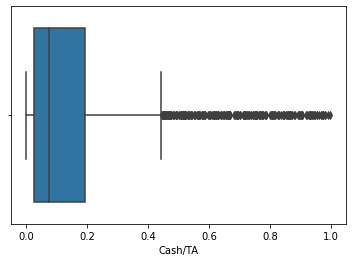

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# check outliers with boxplot
sns.boxplot(df1['Cash/TA'])
plt.show()

In [185]:
# deal with outliers by winzoring
print(df1['Cash/TA'].quantile(0.00))
print(df1['Cash/TA'].quantile(0.90))

0.0
0.4839434290734715


In [186]:
# remove the effect of outliers
# according to the boxplot, replace 1% of the lowest and 2% the highest values by winsorizing
df1['Cash/TA'].clip(lower=df1['Cash/TA'].quantile(0.00),
                    upper=df1['Cash/TA'].quantile(0.90),
                    axis=0, inplace=True)
df1['Cash/TA'].describe()

count    2022.000000
mean        0.140214
std         0.153353
min         0.000000
25%         0.026525
50%         0.074498
75%         0.193506
max         0.483943
Name: Cash/TA, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


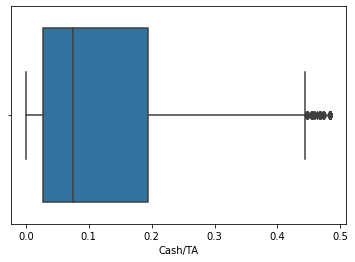

In [187]:
# check if outliers exist after winzoring
sns.boxplot(df1['Cash/TA'])
plt.show()

##### Cash/CL

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


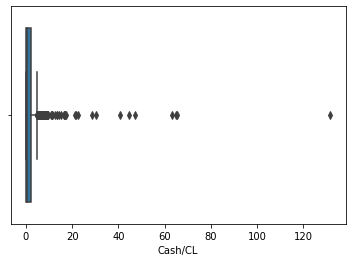

In [188]:
# check outliers with boxplot
sns.boxplot(df1['Cash/CL'])
plt.show()

In [189]:
# deal with outliers by winzoring
print(df1['Cash/CL'].quantile(0.00))
print(df1['Cash/CL'].quantile(0.90))

0.0
2.7112986730476494


In [190]:
# remove the effect of outliers
# according to the boxplot, replace 5% of the lowest and 2% the highest values by winsorizing
df1['Cash/CL'].clip(lower=df1['Cash/CL'].quantile(0.00),
                    upper=df1['Cash/CL'].quantile(0.90),
                    axis=0, inplace=True)
df1['Cash/CL'].describe()

count    2022.000000
mean        1.028216
std         0.930716
min         0.000000
25%         0.221913
50%         0.642435
75%         2.083432
max         2.711299
Name: Cash/CL, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


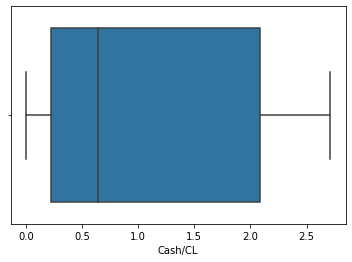

In [191]:
# check if outliers exist after winzoring
sns.boxplot(df1['Cash/CL'])
plt.show()

##### Cash/Interest Expense

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


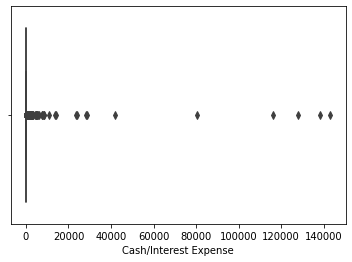

In [192]:
# check outliers with boxplot
sns.boxplot(df1['Cash/Interest Expense'])
plt.show()

In [193]:
# deal with outliers by winzoring
print(df1['Cash/Interest Expense'].quantile(0.00))
print(df1['Cash/Interest Expense'].quantile(0.85))

0.0
47.27893278685917


In [194]:
# remove the effect of outliers
# according to the boxplot, replace 5% of the lowest and 3% of the highest values by winsorizing
df1['Cash/Interest Expense'].clip(lower=df1['Cash/Interest Expense'].quantile(0.00),
                                  upper=df1['Cash/Interest Expense'].quantile(0.85),
                                  axis=0, inplace=True)
df1['Cash/Interest Expense'].describe()

count    2022.000000
mean       14.376623
std        17.010703
min         0.000000
25%         1.519326
50%         5.809825
75%        22.681178
max        47.278933
Name: Cash/Interest Expense, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


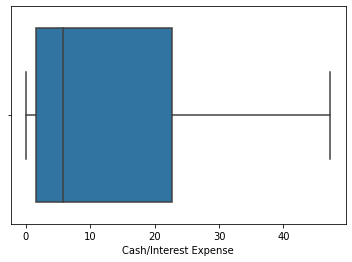

In [195]:
# check if outliers exist after winzoring
sns.boxplot(df1['Cash/Interest Expense'])
plt.show()

##### Quick Ratio

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


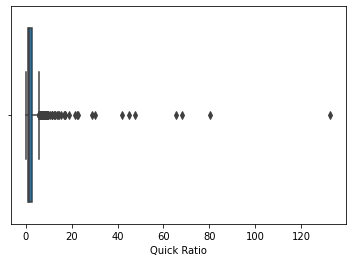

In [196]:
# check outliers with boxplot
sns.boxplot(df1['Quick Ratio'])
plt.show()

In [197]:
# deal with outliers by winzoring
print(df1['Quick Ratio'].quantile(0.00))
print(df1['Quick Ratio'].quantile(0.95))

0.056552262815804
5.555035738890612


In [198]:
# remove the effect of outliers
# according to the boxplot, replace 5% of the highest values by winsorizing
df1['Quick Ratio'].clip(lower=df1['Quick Ratio'].quantile(0.00),
                        upper=df1['Quick Ratio'].quantile(0.95),
                        axis=0, inplace=True)
df1['Quick Ratio'].describe()

count    2022.000000
mean        1.949707
std         1.336237
min         0.056552
25%         0.941378
50%         1.549811
75%         2.855418
max         5.555036
Name: Quick Ratio, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


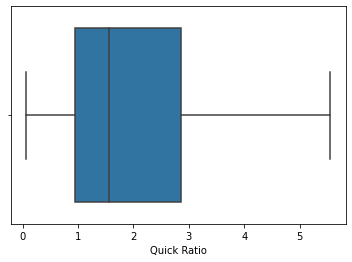

In [199]:
# check if outliers exist after winzoring
sns.boxplot(df1['Quick Ratio'])
plt.show()

##### Long-term Debt/TA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


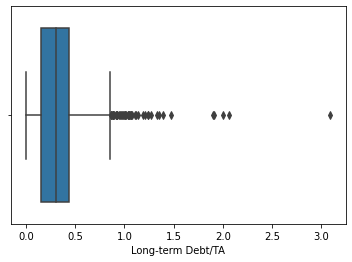

In [200]:
# check outliers with boxplot
sns.boxplot(df1['Long-term Debt/TA'])
plt.show()

In [201]:
# deal with outliers by winzoring
print(df1['Long-term Debt/TA'].quantile(0.00))
print(df1['Long-term Debt/TA'].quantile(0.97))

0.0
0.7796233351806668


In [202]:
# remove the effect of outliers
# according to the boxplot, replace 5% of the highest values by winsorizing
df1['Long-term Debt/TA'].clip(lower=df1['Long-term Debt/TA'].quantile(0.00),
                              upper=df1['Long-term Debt/TA'].quantile(0.97),
                              axis=0, inplace=True)
df1['Long-term Debt/TA'].describe()

count    2022.000000
mean        0.312041
std         0.201288
min         0.000000
25%         0.153549
50%         0.303907
75%         0.435809
max         0.779623
Name: Long-term Debt/TA, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


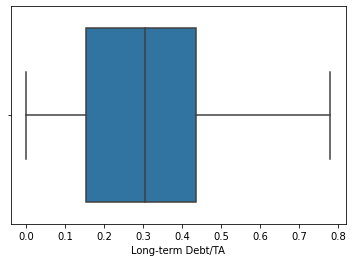

In [203]:
# check if outliers exist after winzoring
sns.boxplot(df1['Long-term Debt/TA'])
plt.show()

##### Fixed Assets/TA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


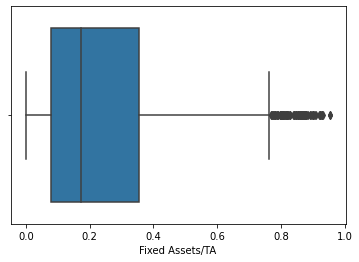

In [204]:
# check outliers with boxplot
sns.boxplot(df1['Fixed Assets/TA'])
plt.show()

In [205]:
# deal with outliers by winzoring
print(df1['Fixed Assets/TA'].quantile(0.00))
print(df1['Fixed Assets/TA'].quantile(0.95))

0.0
0.7986178456391186


In [206]:
# remove the effect of outliers
# according to the boxplot, replace 5% of the highest values by winsorizing
df1['Fixed Assets/TA'].clip(lower=df1['Fixed Assets/TA'].quantile(0.00),
                            upper=df1['Fixed Assets/TA'].quantile(0.95),
                            axis=0, inplace=True)
df1['Fixed Assets/TA'].describe()

count    2022.000000
mean        0.250316
std         0.231879
min         0.000000
25%         0.077808
50%         0.174078
75%         0.353765
max         0.798618
Name: Fixed Assets/TA, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


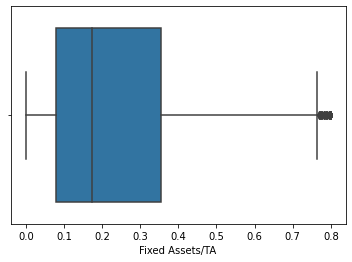

In [207]:
# check if outliers exist after winzoring
sns.boxplot(df1['Fixed Assets/TA'])
plt.show()

##### Sales per Employee

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


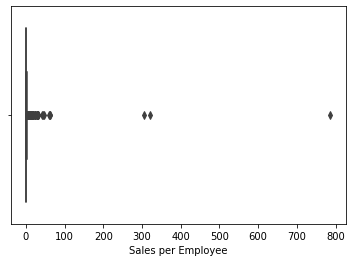

In [208]:
# check outliers with boxplot
sns.boxplot(df1['Sales per Employee'])
plt.show()

In [209]:
# deal with outliers by winzoring
print(df1['Sales per Employee'].quantile(0.00))
print(df1['Sales per Employee'].quantile(0.90))

0.0
2.0139697494383135


In [210]:
# remove the effect of outliers
# according to the boxplot, replace 5% of the highest values by winsorizing
df1['Sales per Employee'].clip(lower=df1['Sales per Employee'].quantile(0.00),
                               upper=df1['Sales per Employee'].quantile(0.90),
                               axis=0, inplace=True)
df1['Sales per Employee'].describe()

count    2022.000000
mean        0.624221
std         0.594010
min         0.000000
25%         0.224528
50%         0.379812
75%         0.801262
max         2.013970
Name: Sales per Employee, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


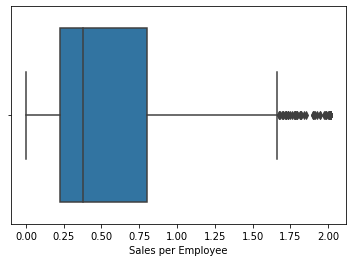

In [211]:
# check if outliers exist after winzoring
sns.boxplot(df1['Sales per Employee'])
plt.show()

##### Interest Expense/EBIT

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


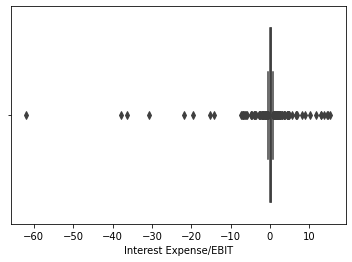

In [212]:
# check outliers with boxplot
sns.boxplot(df1['Interest Expense/EBIT'])
plt.show()

In [213]:
# deal with outliers by winzoring
print(df1['Interest Expense/EBIT'].quantile(0.10))
print(df1['Interest Expense/EBIT'].quantile(0.94))

-0.08178241564134169
0.9361319435924855


In [214]:
# remove the effect of outliers
# according to the boxplot, replace 5% of the highest values by winsorizing
df1['Interest Expense/EBIT'].clip(lower=df1['Interest Expense/EBIT'].quantile(0.10),
                                  upper=df1['Interest Expense/EBIT'].quantile(0.94),
                                  axis=0, inplace=True)
df1['Interest Expense/EBIT'].describe()

count    2022.000000
mean        0.234694
std         0.280338
min        -0.081782
25%         0.031697
50%         0.151023
75%         0.364305
max         0.936132
Name: Interest Expense/EBIT, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


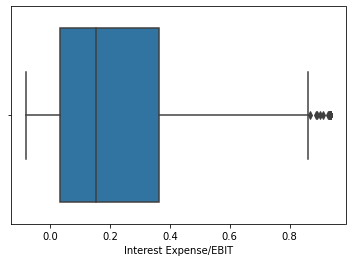

In [215]:
# check if outliers exist after winzoring
sns.boxplot(df1['Interest Expense/EBIT'])
plt.show()

## Step 4. Examine the correlation
(e) Examine the correlation between *Price/Book, P/E, P/EBIT, P/SALES, RetEarly2020,* and *RetLate2020*. In a text box, explain the correlations you observe.

CORRECTION: According to the above process, we will use the ratios as follows: `Book/Price`, `E/P`, `EBIT/P`, `SALES/P`.

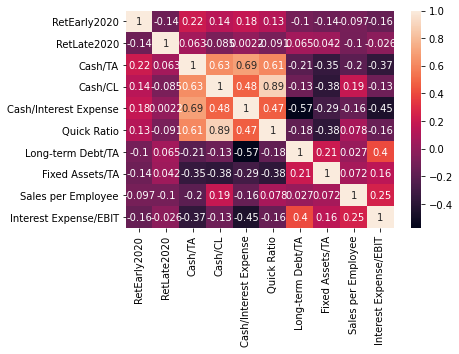

In [216]:
# create correlation matric to check the correlation between the variables
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Correlation Matrix Interpretation
`Cash/CL`: Cash/Current Liabilities

`Long-term Debt/TA`: Long-term Debt/Total Assets


1. From the correlation matrix, in general, the correlation among the market ratios, are higher than the correlation between any of the market ratios and `RetEarly2020` and `RetLate2020`. 
2. The correlation between `Quick Ratio` and `Cash/CL` is the highest among the X variables. Both of them use `Current Liabilities` as denominator, since liquid assets in `Quick Ratio` includes cash on hand or assets other than cash that can be quickly converted into cash, the high correlation makes sense.
3. The correlation between `Long-term Debt/TA` and `Cash/Interest Expense` have the highest negative correlation. We may infer that the firms with lower long-term debt have more cash to cover
immediate interest expenses. 
4. Compared to `RetLate2020`, the correlations between each of market ratios and `RetEarly2020` are stronger. Since the ratios are derived from 2019, the connection might be stronger when it compares to the data closer to 2019, which is `RetEarly2020` in this case.
5. The correaltions between market ratios and `RetEarly2020` and `RetLate2020` are generally negative, which indicates that they’re negatively correlated. Lower market ratios are related to higher `RetEarly2020` and `RetLate2020`.

## Step 5. Estimate linear regression models

### 5.a RetEarly2020

In [217]:
# define the independent variables (X)
x1 = df1[['Cash/TA', 'Cash/CL', 'Cash/Interest Expense', 'Quick Ratio', 'Long-term Debt/TA',
          'Fixed Assets/TA', 'Sales per Employee', 'Interest Expense/EBIT']]

# define the dependent variable (Y)
y1 = df1['RetEarly2020']

In [218]:
# run multiple regression with constant
# use statsmodels
# add a constant
x1 = sm.add_constant(x1) 
model1 = sm.OLS(y1, x1).fit()

# print out regression summary statistics
print_model1 = model1.summary()
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:           RetEarly2020   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     16.97
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.33e-24
Time:                        02:58:31   Log-Likelihood:                -550.26
No. Observations:                2022   AIC:                             1119.
Df Residuals:                    2013   BIC:                             1169.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.25

**Interpretation**

`R-squared: 0.063`

Around 6% of the differences or the variation in observed early 2020 return for companies is explained by the financial ratios, indicating 6% of the variation which varies across all these companies is explained by their financial ratios.

`Adj. R-squared: 0.059`

The adjusted R-squared considers and tests different independent variables against the model. Compared to the model with additional input variables, decreased adjusted R-squared indicates that the additional input variables are not adding value to the model.

In [219]:
df1_table = pd.read_html(print_model1.tables[1].as_html(),header=0,index_col=0)[0]
df1_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.254100,0.027,-9.502,0.000,-0.307,-0.202
Cash/TA,0.267900,0.080,3.335,0.001,0.110,0.425
Cash/CL,0.045900,0.019,2.424,0.015,0.009,0.083
Cash/Interest Expense,0.000059,0.001,0.079,0.937,-0.001,0.002
Quick Ratio,-0.024500,0.012,-2.042,0.041,-0.048,-0.001
Long-term Debt/TA,-0.047900,0.048,-0.998,0.318,-0.142,0.046
Fixed Assets/TA,-0.083400,0.034,-2.443,0.015,-0.150,-0.016
Sales per Employee,-0.035500,0.014,-2.546,0.011,-0.063,-0.008
Interest Expense/EBIT,-0.088400,0.030,-2.940,0.003,-0.147,-0.029


**t-stats**
According to the coefficients in the above summary table:
- **Cash/TA**
- **Cash/CL**
- **Quick Ratio**
- **Fixed Assets/TA**
- **Sales per Employee**
- **Interest Expense/EBIT**
  - The lager the magnitude of the t value, the more the evidence against the null hypothesis, indicating that the more likely there is a significant difference. 
  - The p-values for the above variables are less than 0.05. We can reject the null hypothesis, suggesting that the variable has some effect with a 95% probability of being correct, assuming the model is specified correctly. 
  - We can conclude that the data provide enough evidence to reject the null hypothesis, suggesting that each variable is statistically significant.

- **Cash/Interest Expense**
- **Long-term Debt/TA**
  - The t-values are close to 0. The greater the t-values, the more likely there isn't a significant difference. Their p-values are greater than 0.05. We fail to reject the null hypothesis.

### 5.b RetLate2020

In [220]:
# define the independent variables (X)
x2 = df1[['Cash/TA', 'Cash/CL', 'Cash/Interest Expense', 'Quick Ratio', 'Long-term Debt/TA',
          'Fixed Assets/TA', 'Sales per Employee', 'Interest Expense/EBIT']]

# define the dependent variable (Y)
y2 = df1['RetLate2020']

In [221]:
# run multiple regression with constant
# use statsmodels
# add a constant
x2 = sm.add_constant(x2) 
model2 = sm.OLS(y2, x2).fit()

# print out regression summary statistics
print_model2 = mode2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            RetLate2020   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     10.45
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.88e-14
Time:                        02:01:53   Log-Likelihood:                -3008.4
No. Observations:                2022   AIC:                             6035.
Df Residuals:                    2013   BIC:                             6085.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.83

**Interpretation**

`R-squared: 0.040`

Around 4% of the differences or the variation in observed late 2020 return for companies is explained by the financial ratios, indicating 4% of the variation which varies across all these companies is explained by their financial ratios.

`Adj. R-squared: 0.036`

The adjusted R-squared considers and tests different independent variables against the model. Compared to the model with additional input variables, decreased adjusted R-squared indicates that the additional input variables are not adding value to the model.

In [222]:
df2_table = pd.read_html(print_model2.tables[1].as_html(),header=0,index_col=0)[0]
df2_table

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.8345,0.090,9.253,0.000,0.658,1.011
Cash/TA,1.4419,0.271,5.321,0.000,0.911,1.973
Cash/CL,-0.0968,0.064,-1.516,0.130,-0.222,0.028
Cash/Interest Expense,-0.0004,0.003,-0.149,0.881,-0.005,0.005
Quick Ratio,-0.0930,0.040,-2.298,0.022,-0.172,-0.014
Long-term Debt/TA,0.3867,0.162,2.390,0.017,0.069,0.704
Fixed Assets/TA,0.1161,0.115,1.009,0.313,-0.110,0.342
Sales per Employee,-0.0724,0.047,-1.538,0.124,-0.165,0.020
Interest Expense/EBIT,-0.0209,0.101,-0.206,0.837,-0.220,0.178


**t-stats**
According to the coefficients in the above summary table:
- **Cash/TA**
- **Quick Ratio**
- **Long-term Debt/TA**
  - The lager the magnitude of the t value, the more the evidence against the null hypothesis, indicating that the more likely there is a significant difference. 
  - The p-values for the above variables are less than 0.05. We can reject the null hypothesis, suggesting that the variable has some effect with a 95% probability of being correct, assuming the model is specified correctly. 
  - We can conclude that the data provide enough evidence to reject the null hypothesis, suggesting that each variable is statistically significant.

- **Cash/CL**
- **Cash/Interest Expense**
- **Fixed Assets/TA**
- **Sales per Employee**
- **Interest Expense/EBIT**
  - The t-values are close to 0. The greater the t-values, the more likely there isn't a significant difference. Their p-values are greater than 0.05. We fail to reject the null hypothesis.

According to the coefficients in the above summary table:
- **Cash/TA**: The firms with more cash at the end of 2019 have
higher stock returns in 2020 after Covid shock.
- **Quick Ratio**: In contrast, firms with more liquid assets to cover current
liabilities at end of 2019 have lower stock returns in 2020 after
Covid shock.
- **Long-term Debt/TA**: The firms higher long-term
debt at end of 2019 have higher stock returns in 2020 after Covid
shock.

However, if we consider the R-Squared/Adj. R-Squared, only around 4% of the variation in observed late 2020 return for companies can be explained by the financial ratios. The proportion of the data fit the regression model is quite low. We may consider other indicators as explanatory variables and look for higher explanatory power.

**RetEarly2020 v.s. RetLate2020**

If we compare the Adj. R-squared of `RetEarly2020` versus `RetLate2020`, the Adj. R-squared of `RetEarly2020` is higher than `RetLate2020`. For the model of `RetEarly2020`, the higher Adj. R-squared means more variation in observed 2020 return can be explained by the financials, indicating a better fit for the model. We may infer that during 2020, the pandemic caused volatility and instability to the market. Compared to `RetLate2020`, the model for `RetLate2020` covering longer unstable period, thus has lower explanatory power.

# 2.Does Industry or Sector Explain Differences in Stock Returns for Early (Jan-Mar) and Late (Apr-Dec) 2020? 

## Step 1. Load and merge data 
Download and load the data from `temp1.csv`, `tempGICS.csv`, `tempSIC.csv` into Pandas dataframes. Merge the datasets based on each stock's ticker symbol (TIC).

In [223]:
# # load data
# temp1 = pd.read_csv('temp1.csv')

# # check data
# temp1[temp1.isnull().any(axis=1)]

# # drop the rows with errors
# temp1.drop(temp1.loc[temp1['RetEarly2020'] == '#VALUE!'].index, inplace=True)

# # convert datatype of RetEarly2020 from object to float
# temp1['RetEarly2020'] = pd.to_numeric(temp1['RetEarly2020'])
temp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2711 entries, 0 to 2715
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TICKER        2711 non-null   object 
 1   RetEarly2020  2711 non-null   float64
 2   RetLate2020   2711 non-null   float64
dtypes: float64(2), object(1)
memory usage: 84.7+ KB


In [224]:
# load data
tempGICS = pd.read_csv('tempGICS.csv')
tempGICS.head(3)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,costat,ggroup
0,1004,20200531,2019.0,INDL,C,D,STD,AIR,USD,A,2010
1,1045,20191231,2019.0,INDL,C,D,STD,AAL,USD,A,2030
2,1050,20191231,2019.0,INDL,C,D,STD,CECE,USD,A,2020


In [225]:
# load data
tempNAICS = pd.read_csv('tempNAICS.csv')
tempNAICS.head(3)

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,costat,naics
0,1004,20200531,2019.0,INDL,C,D,STD,AIR,USD,A,423860
1,1045,20191231,2019.0,INDL,C,D,STD,AAL,USD,A,481111
2,1050,20191231,2019.0,INDL,C,D,STD,CECE,USD,A,333413


In [226]:
# merge data
temp = temp1.merge(tempGICS, left_on='TICKER', right_on='tic')
df = temp.merge(tempNAICS, left_on='TICKER', right_on='tic')
df.head()

,TICKER,RetEarly2020,RetLate2020,gvkey_x,datadate_x,fyear_x,indfmt_x,consol_x,popsrc_x,datafmt_x,tic_x,curcd_x,costat_x,ggroup,gvkey_y,datadate_y,fyear_y,indfmt_y,consol_y,popsrc_y,datafmt_y,tic_y,curcd_y,costat_y,naics
0,JJSF,-0.340234,0.300340,12825,20190930,2019.0,INDL,C,D,STD,JJSF,USD,A,3020,12825,20190930,2019.0,INDL,C,D,STD,JJSF,USD,A,311812
1,PLXS,-0.290876,0.433469,12945,20190930,2019.0,INDL,C,D,STD,PLXS,USD,A,4520,12945,20190930,2019.0,INDL,C,D,STD,PLXS,USD,A,334412
2,HNGR,-0.435712,0.411425,16456,20191231,2019.0,INDL,C,D,STD,HNGR,USD,A,3510,16456,20191231,2019.0,INDL,C,D,STD,HNGR,USD,A,621498
3,ORCL,-0.083596,0.356166,12142,20200531,2019.0,INDL,C,D,STD,ORCL,USD,A,4510,12142,20200531,2019.0,INDL,C,D,STD,ORCL,USD,A,519130
4,MSFT,0.003212,0.421139,12141,20190630,2019.0,INDL,C,D,STD,MSFT,USD,A,4510,12141,20190630,2019.0,INDL,C,D,STD,MSFT,USD,A,511210


In [227]:
df.columns

Index(['TICKER', 'RetEarly2020', 'RetLate2020', 'gvkey_x', 'datadate_x',
       'fyear_x', 'indfmt_x', 'consol_x', 'popsrc_x', 'datafmt_x', 'tic_x',
       'curcd_x', 'costat_x', 'ggroup', 'gvkey_y', 'datadate_y', 'fyear_y',
       'indfmt_y', 'consol_y', 'popsrc_y', 'datafmt_y', 'tic_y', 'curcd_y',
       'costat_y', 'naics'],
      dtype='object')

In [228]:
# extract required columns
df = df.loc[:, ['TICKER', 'RetEarly2020', 'RetLate2020', 'ggroup', 'naics']]
df.head()

,TICKER,RetEarly2020,RetLate2020,ggroup,naics
0,JJSF,-0.340234,0.300340,3020,311812
1,PLXS,-0.290876,0.433469,4520,334412
2,HNGR,-0.435712,0.411425,3510,621498
3,ORCL,-0.083596,0.356166,4510,519130
4,MSFT,0.003212,0.421139,4510,511210


In [229]:
# save data to csv file
df.to_csv('Return2020_w_Industry_Codes.csv', index=False)
!cp Return2020_w_Industry_Codes.csv "/content/gdrive/My Drive/Colab Notebooks/BA870/Individual Project"
!ls

cp: 'Return2020_w_Industry_Codes.csv' and '/content/gdrive/My Drive/Colab Notebooks/BA870/Individual Project/Return2020_w_Industry_Codes.csv' are the same file
'Individual Project- Tzu-Hua Huang.ipynb'   tempGICS.csv
 new_file_in_working_directory.txt	    tempNAICS.csv
 Return2020.csv				    tempSIC.csv
 Return2020_w_Industry_Codes.csv	    WRDS_Variables.csv


## Step 2. Create industry indicators


### 2.a GICS GGROUP
Create Industry Indicator (category) variables for the 24 Industry categories based on GICS GGROUP.

In [230]:
# extract necessary columns
df_gics = pd.read_csv('Return2020_w_Industry_Codes.csv')
df_gics = df_gics.loc[:, ['TICKER', 'RetEarly2020', 'RetLate2020', 'ggroup']]
df_gics.head()

,TICKER,RetEarly2020,RetLate2020,ggroup
0,JJSF,-0.340234,0.300340,3020
1,PLXS,-0.290876,0.433469,4520
2,HNGR,-0.435712,0.411425,3510
3,ORCL,-0.083596,0.356166,4510
4,MSFT,0.003212,0.421139,4510


In [231]:
df_gics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TICKER        2665 non-null   object 
 1   RetEarly2020  2665 non-null   float64
 2   RetLate2020   2665 non-null   float64
 3   ggroup        2665 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 83.4+ KB


In [232]:
# create industry indicators
df_gics = pd.get_dummies(df_gics, columns=['ggroup'], dtype=int)
df_gics.head()

,TICKER,RetEarly2020,RetLate2020,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,ggroup_2550,ggroup_3010,ggroup_3020,ggroup_3030,ggroup_3510,ggroup_3520,ggroup_4010,ggroup_4020,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010
0,JJSF,-0.340234,0.300340,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PLXS,-0.290876,0.433469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,HNGR,-0.435712,0.411425,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,ORCL,-0.083596,0.356166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,MSFT,0.003212,0.421139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [233]:
df_gics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TICKER        2665 non-null   object 
 1   RetEarly2020  2665 non-null   float64
 2   RetLate2020   2665 non-null   float64
 3   ggroup_1010   2665 non-null   int64  
 4   ggroup_1510   2665 non-null   int64  
 5   ggroup_2010   2665 non-null   int64  
 6   ggroup_2020   2665 non-null   int64  
 7   ggroup_2030   2665 non-null   int64  
 8   ggroup_2510   2665 non-null   int64  
 9   ggroup_2520   2665 non-null   int64  
 10  ggroup_2530   2665 non-null   int64  
 11  ggroup_2550   2665 non-null   int64  
 12  ggroup_3010   2665 non-null   int64  
 13  ggroup_3020   2665 non-null   int64  
 14  ggroup_3030   2665 non-null   int64  
 15  ggroup_3510   2665 non-null   int64  
 16  ggroup_3520   2665 non-null   int64  
 17  ggroup_4010   2665 non-null   int64  
 18  ggroup_4020   2665 non-null 

### 2.b NAICS
Create Industry Indicator (category) variables for the industry categories based on NAICS.

In [234]:
# extract necessary columns
df_naics = pd.read_csv('Return2020_w_Industry_Codes.csv')
df_naics = df_naics.loc[:, ['TICKER', 'RetEarly2020', 'RetLate2020', 'naics']]
df_naics.head()

,TICKER,RetEarly2020,RetLate2020,naics
0,JJSF,-0.340234,0.300340,311812
1,PLXS,-0.290876,0.433469,334412
2,HNGR,-0.435712,0.411425,621498
3,ORCL,-0.083596,0.356166,519130
4,MSFT,0.003212,0.421139,511210


In [235]:
df_naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TICKER        2665 non-null   object 
 1   RetEarly2020  2665 non-null   float64
 2   RetLate2020   2665 non-null   float64
 3   naics         2665 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 83.4+ KB


In [236]:
df_naics[['naics']] = df_naics[['naics']].astype(str)
df_naics['Sector_naics'] = df_naics['naics'].str[:2]
df_naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TICKER        2665 non-null   object 
 1   RetEarly2020  2665 non-null   float64
 2   RetLate2020   2665 non-null   float64
 3   naics         2665 non-null   object 
 4   Sector_naics  2665 non-null   object 
dtypes: float64(2), object(3)
memory usage: 104.2+ KB


In [237]:
# create industry indicators
df_naics = pd.get_dummies(df_naics, columns=['Sector_naics'], dtype=int)
df_naics.head()

,TICKER,RetEarly2020,RetLate2020,naics,Sector_naics_11,Sector_naics_21,Sector_naics_22,Sector_naics_23,Sector_naics_31,Sector_naics_32,Sector_naics_33,Sector_naics_42,Sector_naics_44,Sector_naics_45,Sector_naics_48,Sector_naics_49,Sector_naics_51,Sector_naics_52,Sector_naics_53,Sector_naics_54,Sector_naics_56,Sector_naics_61,Sector_naics_62,Sector_naics_71,Sector_naics_72,Sector_naics_81,Sector_naics_99
0,JJSF,-0.340234,0.300340,311812,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PLXS,-0.290876,0.433469,334412,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HNGR,-0.435712,0.411425,621498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,ORCL,-0.083596,0.356166,519130,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,MSFT,0.003212,0.421139,511210,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [238]:
df_naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TICKER           2665 non-null   object 
 1   RetEarly2020     2665 non-null   float64
 2   RetLate2020      2665 non-null   float64
 3   naics            2665 non-null   object 
 4   Sector_naics_11  2665 non-null   int64  
 5   Sector_naics_21  2665 non-null   int64  
 6   Sector_naics_22  2665 non-null   int64  
 7   Sector_naics_23  2665 non-null   int64  
 8   Sector_naics_31  2665 non-null   int64  
 9   Sector_naics_32  2665 non-null   int64  
 10  Sector_naics_33  2665 non-null   int64  
 11  Sector_naics_42  2665 non-null   int64  
 12  Sector_naics_44  2665 non-null   int64  
 13  Sector_naics_45  2665 non-null   int64  
 14  Sector_naics_48  2665 non-null   int64  
 15  Sector_naics_49  2665 non-null   int64  
 16  Sector_naics_51  2665 non-null   int64  
 17  Sector_naics_5

## Step 3. Calculation and estimation
For both *ReturnEarly2020* and *ReturnLate2020*, calculate and estimate the following:

### 3.a GICS GGROUP

#### i. Average stock returns
What are the average stock returns for each industry classification (24 industry groups)?

1. Do the highest and lowest return industries make economic sense for early and late 2020? Explain in detail.

In [239]:
df_gics_AvgRet = df_gics.drop(columns=['TICKER'])
df_gics_AvgRet = df_gics_AvgRet.melt(id_vars=['RetEarly2020', 'RetLate2020']).groupby(['variable', 'value']).mean()
df_gics_AvgRet.query('value == 1')

,,RetEarly2020,RetLate2020
variable,value,,
ggroup_1010,1,-0.580745,1.017517
ggroup_1510,1,-0.350917,0.873224
ggroup_2010,1,-0.316910,0.898123
ggroup_2020,1,-0.332514,0.605461
ggroup_2030,1,-0.326556,0.709745
ggroup_2510,1,-0.429483,1.811358
ggroup_2520,1,-0.391515,1.594357
ggroup_2530,1,-0.448220,1.131115
ggroup_2550,1,-0.385352,1.780307


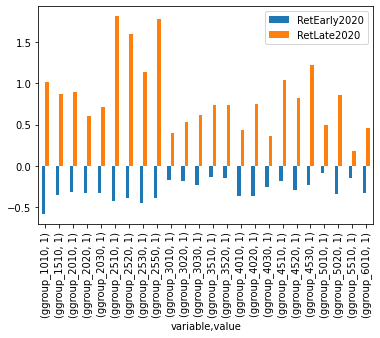

In [240]:
# barplot
df_gics_AvgRet.query('value == 1').plot(kind='bar')

**RetEarly2020**

- Among all the industries, the telecommunication services sector (`ggroup_5010`) has the highest return rate in 2020, indicating the magnitude telecommunication sector impacted by the pandemic is the least. However, the negative change of return suggests the telecommunication services sector faced a loss in early 2020. We can infer that during the pandemic, people still rely on communication and require telecommunication services.
- Compared to the other industries, the energy sector (`ggroup_1010`) has the lowest returns in 2020. During the pandemic, people were confined to their homes and restricted to travel, resulting in a declined oil demand and a decrease in returns, which made the energy sector the sector impacted by the pandemic the worst.

**RetLate2020**
- For late 2020, the consumer discretionary sector (`ggroup_2510`) has the highest return compared to the other industries. The pandemic caused a consumption shock due to the lockdown and forced shutdown across several industries. However, during recovering from the pandemic in 2020, people may have been accumulating more savings while forced to cut back on spending from lockdowns and travel restrictions. Thus, in late 2020, the consumer discretionary sector may have the highest bounce in return.
- In contrast, the utilities sector (`ggroup_5510`) has the lowest return growth among all the industries. If we compare to early 2020, the magnitude utilities industry affected by the pandemic was less than the other industries. We may infer that the pandemic comparatively less affected the sector. After the COVID-19 virus has been controlled, the extent it recovered from the pandemic would also be less than the other sectors. On the other hand, the utilities were affected by the stopped commercial activities and restrictions on public transport; power demand might take time to recover from the pandemic.

#### ii. Fixed effect regressions
Run fixed effect regressions (using industry fixed effects) to explain both *ReturnEarly2020* and *ReturnLate2020:*

1. You may wish to review the lecture notes from Lecture #3 and use the Colab Notebook: Fixed_Effect_Regression_for_BA870_Lecture_3.ipynb that is posted on QTools in Lecture #3 folder.
2. What is the explanatory power of these regressions using different types of industry variables. Is this high or low?Explain.

Combine the industry fixed effects with other explanatory variables (see Assignment #3 and/or the financial ratios described in OPTION (3) below).
   - Run combined regressions with both industry and other “X” variables.

**RetEarly2020**

In [241]:
# define x as a subset of original dataframe
x1_gics = df_gics.drop(columns=['TICKER', 'RetEarly2020', 'RetLate2020'])
# define y as a series (RetEarly2020)
y1_gics = df_gics['RetEarly2020']

# run fixed effect regression
# pass x as a dataframe, while pass y as a series
model1_gics = sm.OLS(y1_gics, x1_gics).fit()

# print out regression summary statistics
print(model1_gics.summary())

                            OLS Regression Results                            
Dep. Variable:           RetEarly2020   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     17.25
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.57e-64
Time:                        02:58:33   Log-Likelihood:                -501.12
No. Observations:                2665   AIC:                             1050.
Df Residuals:                    2641   BIC:                             1192.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ggroup_1010    -0.5807      0.029    -20.189      

**R-squared & Adj. R-squared**

- `R-squared`: 0.131

Around 13% of the variation in `RetEarly2020` is explained by the industries that the companies belong to. We can infer that returns in early 2020 are described by its business model of the type of business that operates. So 13% of the variation which varies across all these companies is explained by the sector itself.

- `Adjusted R-squared`: 0.123

However, the Adjusted R-squared is less than the R-squared, which is 0.123. Since Adjusted R-squared considers different independent variables against the model, a decrease inA djusted R-squared indicates the additional variables doen't improve the model more than would be expected by chance.

**t-stats**

Among all the variables, except `ggroup_5010`, all the sector variables have large t-values, indicating the most significant difference compared to the other models. Their p-values are also far less than 0.05. We can reject the null hypothesis and conclude that the data provide enough evidence to reject the null hypothesis, suggesting that each variable is statistically significant. Data favor the hypothesis that there is a non-zero correlation between almost all the variables and `RetEarly2020`.

**RetLate2020**

In [242]:
# define x as a subset of original dataframe
x2_gics = df_gics.drop(columns=['TICKER', 'RetEarly2020', 'RetLate2020'])
# define y as a series (RetLate2020)
y2_gics = df_gics['RetLate2020']

# run fixed effect regression
# pass x as a dataframe, while pass y as a series
model2_gics = sm.OLS(y2_gics, x2_gics).fit()

# print out regression summary statistics
print(model2_gics.summary())

                            OLS Regression Results                            
Dep. Variable:            RetLate2020   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     14.17
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           8.28e-52
Time:                        02:58:33   Log-Likelihood:                -3816.5
No. Observations:                2665   AIC:                             7681.
Df Residuals:                    2641   BIC:                             7822.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ggroup_1010     1.0175      0.100     10.195      

**R-squared & Adj. R-squared**

- `R-squared`: 0.110

  Around 11% of the variation in `RetLate2020` is explained by the industries that the companies belong to. We can infer that returns in late 2020 are described by its business model of the type of business that operates. So 11% of the variation which varies across all these companies is explained by the sector itself.

- `Adjusted R-squared`: 0.102

  However, the Adjusted R-squared decreases compared to the R-squared, which is 0.102, indicating that the increase in the variables in the model doesn't enhance the explanatory power of the model. 

**t-stats**

Compared to the regression model for `RetEarly2020`, there are more variables have large p-values. In general, most of the variables have large t-values, and their p-values are also far less than 0.05. We can reject the null hypothesis and conclude that the data provide enough evidence to reject the null hypothesis, suggesting that each variable is statistically significant. Data favor the hypothesis that there is a non-zero correlation between almost all the variables and `RetLate2020`. 

On the other hand, sector variables `ggroup_3010` and `ggroup_5510` have p-values greater than 0.05. We fail to reject the null, suggesting that the variables are not statistically significant.

### 3.b NAICS

#### i. Average stock returns
What are the average stock returns for each industry classification (23 industry groups)?

1. Do the highest and lowest return industries make economic sense for early and late 2020? Explain in detail.

In [243]:
df_naics_AvgRet = df_naics.drop(columns=['TICKER'])
df_naics_AvgRet = df_naics_AvgRet.melt(id_vars=['RetEarly2020', 'RetLate2020']).groupby(['variable', 'value']).mean()
df_naics_AvgRet.query('value == 1')

,,RetEarly2020,RetLate2020
variable,value,,
Sector_naics_11,1,-0.158294,0.123019
Sector_naics_21,1,-0.597364,1.231517
Sector_naics_22,1,-0.155907,0.191994
Sector_naics_23,1,-0.371588,1.090058
Sector_naics_31,1,-0.281907,0.775376
Sector_naics_32,1,-0.182609,0.760634
Sector_naics_33,1,-0.293057,1.022835
Sector_naics_42,1,-0.320072,0.755734
Sector_naics_44,1,-0.388449,1.527506


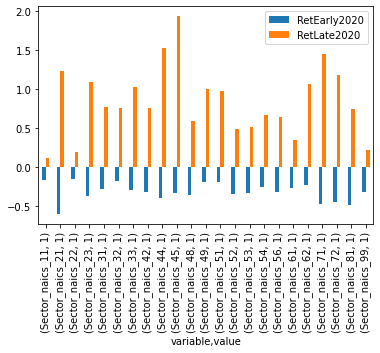

In [244]:
# barplot
df_naics_AvgRet.query('value == 1').plot(kind='bar')

**RetEarly2020**

- Among all the industries, the Utilities sector (`Sector_naics_45`) has the highest return rate in 2020, indicating the magnitude telecommunication sector impacted by the pandemic is the least. However, the negative change of return suggests the Utilities sector faced a loss in early 2020. 
- Compared to the other industries, the Mining, Quarrying, and Oil and Gas Extraction sector (`Sector_naics_21`) has the lowest returns in 2020. During the pandemic, people were confined to their homes and restricted to travel, resulting in a declined oil demand and a decrease in returns, which made the energy sector the sector impacted by the pandemic the worst.

**RetLate2020**
- For late 2020, the Retail Trade sector (`Sector_naics_45`) has the highest return compared to the other industries. The pandemic caused a consumption shock due to the lockdown and forced shutdown across several industries. However, during recovering from the pandemic in 2020, people may have been accumulating more savings while forced to cut back on spending from lockdowns and travel restrictions. Thus, in late 2020, the Retail Trade sector may have the highest bounce in return.
- In contrast, the Agriculture, Forestry, Fishing and Hunting sector (`Sector_naics_21`) has the lowest return growth among all the industries.

#### ii. Fixed effect regressions
Run fixed effect regressions (using industry fixed effects) to explain both *ReturnEarly2020* and *ReturnLate2020:*

1. You may wish to review the lecture notes from Lecture #3 and use the Colab Notebook: Fixed_Effect_Regression_for_BA870_Lecture_3.ipynb that is posted on QTools in Lecture #3 folder.
2. What is the explanatory power of these regressions using different types of industry variables. Is this high or low?Explain.

Combine the industry fixed effects with other explanatory variables (see Assignment #3 and/or the financial ratios described in OPTION (3) below).
   - Run combined regressions with both industry and other “X” variables.

**RetEarly2020**

In [245]:
# define x as a subset of original dataframe
x1_naics = df_naics.drop(columns=['TICKER', 'RetEarly2020', 'RetLate2020', 'naics'])
# define y as a series (RetEarly2020)
y1_naics = df_naics['RetEarly2020']

# run fixed effect regression
# pass x as a dataframe, while pass y as a series
model1_naics = sm.OLS(y1_naics, x1_naics).fit()

# print out regression summary statistics
print(model1_naics.summary())

                            OLS Regression Results                            
Dep. Variable:           RetEarly2020   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     10.88
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.42e-36
Time:                        02:58:33   Log-Likelihood:                -572.06
No. Observations:                2665   AIC:                             1190.
Df Residuals:                    2642   BIC:                             1326.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sector_naics_11    -0.1583      0.123     

**R-squared & Adj. R-squared**

- `R-squared`: 0.083

Around 8% of the variation in `RetEarly2020` is explained by the industries that the companies belong to. We can infer that returns in early 2020 are described by its business model of the type of business that operates. So 8% of the variation which varies across all these companies is explained by the sector itself.

- `Adjusted R-squared`: 0.075

However, the Adjusted R-squared is less than the R-squared, which is 0.075. Since Adjusted R-squared considers different independent variables against the model, a decrease inA djusted R-squared indicates the additional variables doen't improve the model more than would be expected by chance.

**t-stats**

Among all the variables, except `Sector_naics_49` and `Sector_naics_99`, all the sector variables have large t-values, indicating the most significant difference compared to the other models. Their p-values are also far less than 0.05. We can reject the null hypothesis and conclude that the data provide enough evidence to reject the null hypothesis, suggesting that each variable is statistically significant. Data favor the hypothesis that there is a non-zero correlation between almost all the variables and `RetEarly2020`.

**RetLate2020**

In [246]:
# define x as a subset of original dataframe
x2_naics = df_naics.drop(columns=['TICKER', 'RetEarly2020', 'RetLate2020', 'naics'])
# define y as a series (RetLate2020)
y2_naics = df_naics['RetLate2020']

# run fixed effect regression
# pass x as a dataframe, while pass y as a series
model2_naics = sm.OLS(y2_naics, x2_naics).fit()

# print out regression summary statistics
print(model2_naics.summary())

                            OLS Regression Results                            
Dep. Variable:            RetLate2020   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           4.51e-35
Time:                        02:58:33   Log-Likelihood:                -3859.9
No. Observations:                2665   AIC:                             7766.
Df Residuals:                    2642   BIC:                             7901.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sector_naics_11     0.1230      0.422     

**R-squared & Adj. R-squared**

- `R-squared`: 0.080

  Around 8% of the variation in `RetLate2020` is explained by the industries that the companies belong to. We can infer that returns in late 2020 are described by its business model of the type of business that operates. So 8% of the variation which varies across all these companies is explained by the sector itself.

- `Adjusted R-squared`: 0.073

  However, the Adjusted R-squared decreases compared to the R-squared, which is 0.073, indicating that the increase in the variables in the model doesn't enhance the explanatory power of the model. 

**t-stats**

Compared to the regression model for `RetEarly2020`, there are more variables have large p-values. In general, most of the variables have large t-values, and their p-values are also far less than 0.05. We can reject the null hypothesis and conclude that the data provide enough evidence to reject the null hypothesis, suggesting that each variable is statistically significant. Data favor the hypothesis that there is a non-zero correlation between almost all the variables and `RetLate2020`. 